In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import scipy.interpolate as scin
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
bin_data = np.fromfile('../data/surface_synoptic_20161109_0000_lon_lat_temperature_17097.bin', dtype=np.float32)
nrec = 17097

In [5]:
lons = bin_data[:nrec]
lats = bin_data[nrec:nrec*2]
temp = bin_data[nrec*2:nrec*3]

In [6]:
euro_idx = (lons > -10) & (lons < 60) & (lats > 35) & (lats < 70)

In [7]:
lon1d = np.arange(-10, 60.1, 0.5)
lat1d = np.arange(35, 70.1, 0.5)
lon2d, lat2d = np.meshgrid(lon1d, lat1d)

In [8]:
temp_grd_lin = scin.griddata((lons[euro_idx], lats[euro_idx]), temp[euro_idx], (lon2d, lat2d), method='linear')
temp_grd_near = scin.griddata((lons[euro_idx], lats[euro_idx]), temp[euro_idx], (lon2d, lat2d), method='nearest')
temp_grd_cub = scin.griddata((lons[euro_idx], lats[euro_idx]), temp[euro_idx], (lon2d, lat2d), method='cubic')

In [9]:
plt_kwargs = dict(cmap='viridis', vmin=-28, vmax=28) #, transform=ccrs.PlateCarree())
ax_kwargs = {} #dict(subplot_kw=dict(projection=ccrs.PlateCarree()))

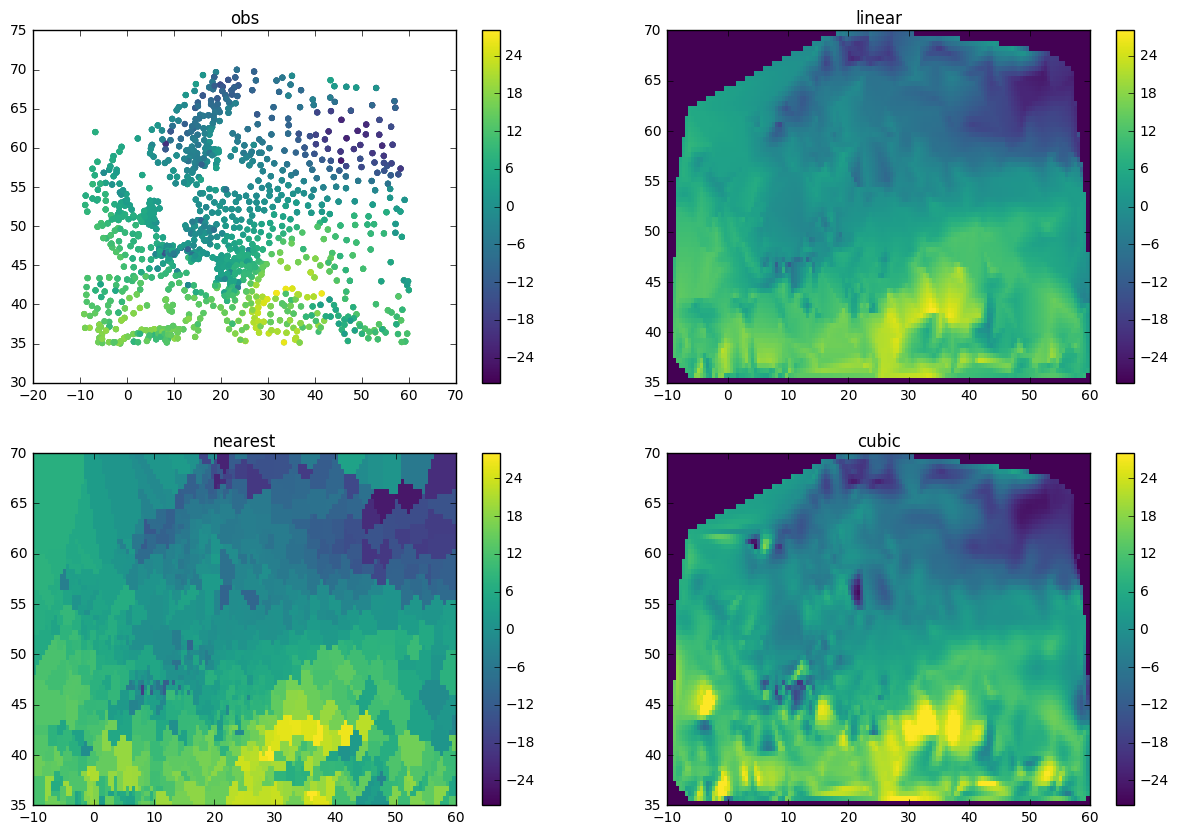

In [10]:
fig, axs = plt.subplots(figsize=(15, 10), nrows=2, ncols=2, **ax_kwargs)
axs = axs.flatten()
p = []
p.append(axs[0].scatter(lons[euro_idx], lats[euro_idx], c=temp[euro_idx],
                        edgecolors='none', **plt_kwargs))

p.append(axs[1].pcolormesh(lon2d, lat2d, temp_grd_lin, **plt_kwargs))

p.append(axs[2].pcolormesh(lon2d, lat2d, temp_grd_near, **plt_kwargs))

p.append(axs[3].pcolormesh(lon2d, lat2d, temp_grd_cub, **plt_kwargs))

titles = ['obs', 'linear', 'nearest', 'cubic']
for ax, h, title in zip(axs, p, titles):
#     ax.coastlines()
#     ax.set_extent([-25, 65, 30, 75])
#     ax.gridlines()
    fig.colorbar(h, ax=ax)
    ax.set_title(title)